In [9]:
import sys
# Add the src directory to the Python path
sys.path.insert(0, '../src')

In [10]:
from botcoin.profilers.stock import StockProfiler

In [11]:
symbol = "MSTR"
profiler = StockProfiler()

In [12]:
profile = profiler.profile(symbol)

2025-06-09 16:55:59,461 - YfDataProvider - WARNING: The date range does not contain any market open times.
2025-06-09 16:55:59,464 - DataManager - INFO: Data saved to data\MSTR_ohlcv_1d.parquet


In [13]:
returns_1min = profile["1min_returns"]
print(f"Profile for {symbol}:")
print(f"Number of 1-minute returns for {symbol}: {len(returns_1min)}")
print(f"Mean 1-minute returns for {symbol}: {returns_1min.mean():.6f}")
print(f"Standard deviation of 1-minute returns for {symbol}: {returns_1min.std():.6f}")
print(f"Max 1-minute return for {symbol}: {returns_1min.max():.6f}")
print(f"Min 1-minute return for {symbol}: {returns_1min.min():.6f}")

Profile for MSTR:
Number of 1-minute returns for MSTR: 7369
Mean 1-minute returns for MSTR: -0.000029
Standard deviation of 1-minute returns for MSTR: 0.001470
Max 1-minute return for MSTR: 0.014088
Min 1-minute return for MSTR: -0.014058


In [14]:
returns_1d = profile["1d_returns"]
print(f"Number of 1-day returns for {symbol}: {len(returns_1d)}")
print(f"Mean 1-day returns for {symbol}: {returns_1d.mean():.6f}")
print(f"Standard deviation of 1-day returns for {symbol}: {returns_1d.std():.6f}")
print(f"Max 1-day return for {symbol}: {returns_1d.max():.6f}")
print(f"Min 1-day return for {symbol}: {returns_1d.min():.6f}")

Number of 1-day returns for MSTR: 1255
Mean 1-day returns for MSTR: 0.001157
Standard deviation of 1-day returns for MSTR: 0.049597
Max 1-day return for MSTR: 0.244711
Min 1-day return for MSTR: -0.258294


In [15]:
# Compute percentage of data within ±1 std
data = returns_1d
mean = data.mean()
std = data.std()
lower_bound = mean - std
upper_bound = mean + std
within_std = data[(data >= lower_bound) & (data <= upper_bound)]
percentage_within_std = len(within_std) / len(data) * 100
print(f"Percentage of 1-day returns within ±1 std for {symbol}: {percentage_within_std:.2f}%")

Percentage of 1-day returns within ±1 std for MSTR: 75.62%


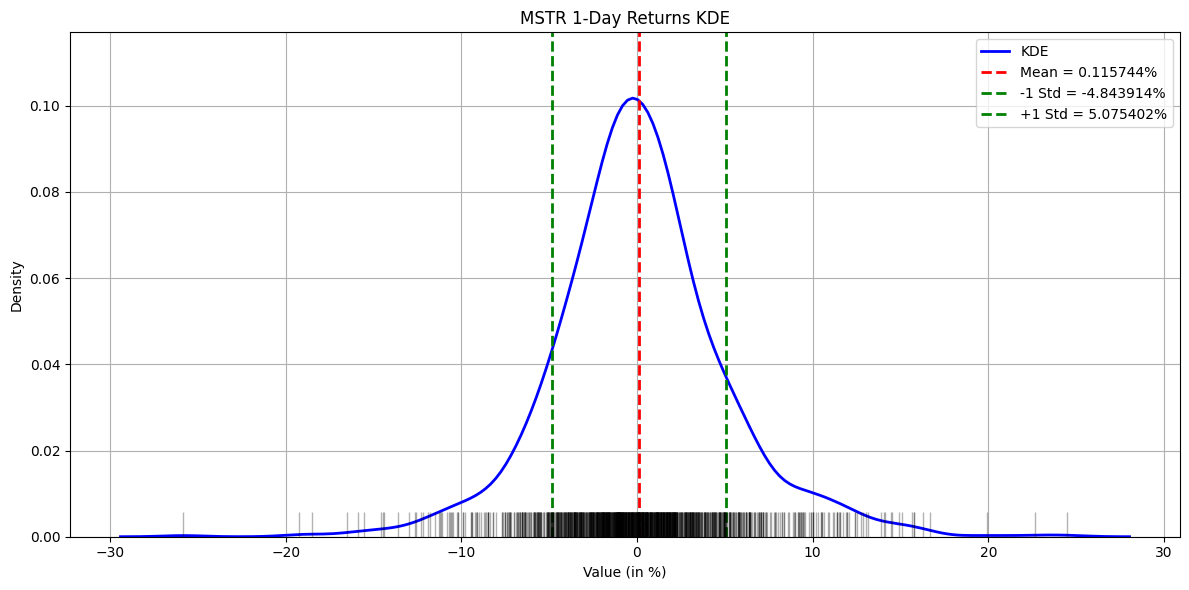

In [16]:
from botcoin.utils.visual.statistics import plot_kde_with_stats

plot_kde_with_stats(returns_1d, title=f"{symbol} 1-Day Returns KDE")
